# Part 2: Unsupervised Learning

## Introduction

Unsupervised learning consists of machine learning algorithms that extract insigns from data with unknown labels. Two main types of unsupervised learning are transformations and clustering.Transformations convert data into more simple, meaningful representations. This can be done through dimensionality reduction or component extraction. Dimentionality reduction summarizes high dimensional data into less features. Component extraction identifies underlying structures of data. Clustering groups similar data into groups, without prior knowledge of the actual groups. Two core types of unsupervised learning models include principle component analysis (PCA) and k-means clustering.

## Principal Component Analysis (PCA)

PCA is a technique used for dimensionality reduction and feature extraction that transforms data into a set of principle components (linearly uncorrelated variables). The first principle component measures the maximum variance and each next is the next highest variance that is orthogonal to the previous. This is done by sorting components by eigenvalues from largest to smallest. Advantages of PCA are that it reduces dimensionality, reduces overfitting, and improves visualization ability for high-dimensional data. Disadvantages are the sesitivity to scaling, the assumption that variance implies importance, the linear relationship assumes, and the loss of interpretability through linearizing features. Use cases include anomaly detection and finance risk analysis.

### Case Study

Explained Variance Ratio by Component: [0.22057176 0.14395563 0.05458802 0.05116399 0.04069273 0.03012154
 0.02750481 0.02325871 0.01694438 0.01309833]
Total Variance Retained: 0.62


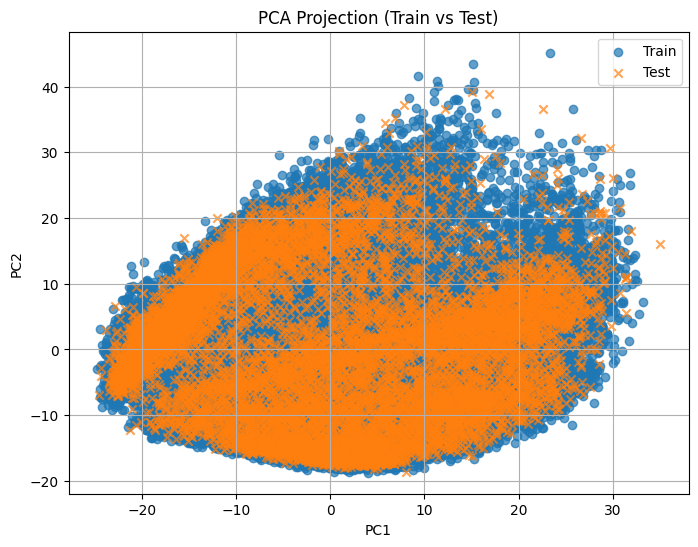

In [18]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# load data
data_path = "C:/Users/scgoo/OneDrive/Documents/colleges/Jacksonville/Spring 2025/Math 470 - ML Algorithms/githubMath470/Final Project/data/"
train_df = pd.read_csv(data_path + "fashion-mnist_train.csv")
test_df = pd.read_csv(data_path + "fashion-mnist_test.csv")
X_train = train_df.drop(columns=["label"], errors='ignore')
X_test = test_df.drop(columns=["label"], errors='ignore')

# standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# fit PCA on training set
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio by Component: {explained_variance}")
print(f"Total Variance Retained: {explained_variance.sum():.2f}")

# visualize
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.7, label="Train")
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], alpha=0.7, label="Test", marker='x')
plt.title("PCA Projection (Train vs Test)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

### Report

The [Fashion MNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist) data used for this model is from kaggle. This PCA model predicts the label based on pixels by selecting 10 principal components from pixels 1-784. The total retained variance of 0.62 means 62% of the original variance is captured by the 10 components selected. This indicates this model and datset have potential for strong predictive power, but further tuning is required to determine if this can be improved. 

## K-Means Clustering

K-means is a technique used for clustering data into k number of distinct, non-overlapping groups based on similarity. This algorithm aims to minimize variance within clusters and maximize variance between clusters. Datapoints are assigned to the nearest centroid, measuring euclidean distances from the centroid, moving the centroid to the mean of that cluster, and repeating until centroids converge. Advantages are that this is highly scalable, interpretable, and computationally efficient. Disadvantages are the assumption of spherical clusters, sensitivity to outliers, and rigid clustering. Use cases include customer segmentation and document clustering. 

### Case Study

In [16]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# load data
df = pd.read_csv(data_path + "Mall_Customers.csv")
if "Gender" in df.columns:
    df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
X = df.drop("Spending Score (1-100)", axis=1)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# standardize 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train & predict
kmeans = KMeans(n_clusters=9, random_state=42)
train_clusters = kmeans.fit_predict(X_train_scaled)
test_clusters = kmeans.predict(X_test_scaled)

# evaluate with silhouette score
print(f"Silhouette Score: {silhouette_score(X_train_scaled, train_clusters):.3f}")


Silhouette Score: 0.404


### Report

The [Customer Segmentation](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python) data used for this model is from kaggle. This k-means clustering model predicts clusters of customers based on customer gender, age, annual income, and spending score. Silhouette score measures how well each data point fits within its assigned cluster compared to other clusters and the average of all of them indicates model cluster quality. The average silhouette score of 0.404 indicates that clusters have moderate overlap that is negatively impacting the confidence of the clusters. However, tuning may help improve predction power. 